In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('spam2.csv')

In [9]:
df.sample(5)

,email,label
1324,daniel quinlan quinlan pathname com wrote exac...,0
2921,hello you may have seen this business before a...,1
1063,once upon a time rob wrote i dl d gccNUMBER an...,0
412,congrats in the end if they didn t have max th...,0
2420,url URL date not supplied sufferers fail to pr...,0


In [10]:
df.shape

(3000, 2)

In [11]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [14]:
df.sample(5)

,email,label
208,on tue aug NUMBER NUMBER at NUMBER NUMBER NUMB...,0
2074,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0
2131,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0
699,anarchist scavenger hunt raises d c police ir...,0
483,if it s unwritten how m i supposed to know unl...,0


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['label'] = encoder.fit_transform(df['label'])

In [17]:
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [18]:
# missing values
df.isnull().sum()

email    1
label    0
dtype: int64

In [19]:
# check for duplicate values
df.duplicated().sum()

127

In [20]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [23]:
df.dropna(inplace=True)

C:\Users\teams\AppData\Local\Temp\ipykernel_5992\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [24]:
df.isnull().sum()

email    0
label    0
dtype: int64

In [25]:
df.shape

(2872, 2)

In [28]:
df['email'].dtype

dtype('O')

## 2.EDA

In [26]:
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [27]:
df['label'].value_counts()

0    2445
1     427
Name: label, dtype: int64

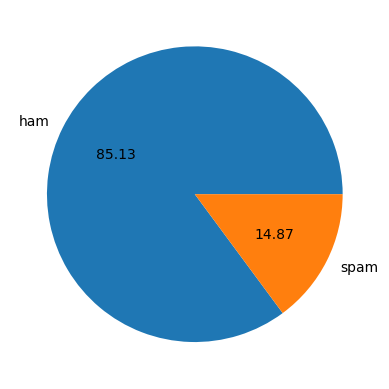

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
# Data is imbalanced

In [31]:
import nltk

In [32]:
!pip install nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\teams\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
df['num_characters'] = df['email'].apply(len)

C:\Users\teams\AppData\Local\Temp\ipykernel_5992\3832259759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['email'].apply(len)


In [35]:
df.head()

,email,label,num_characters
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522
1,martin a posted tassos papadopoulos the greek ...,0,643
2,man threatens explosion in moscow thursday aug...,0,1509
3,klez the virus that won t die already the most...,0,1015
4,in adding cream to spaghetti carbonara which ...,0,771


In [36]:
# num of words
df['num_words'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\teams\AppData\Local\Temp\ipykernel_5992\3219763538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))


In [37]:
df.head()

,email,label,num_characters,num_words
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257
1,martin a posted tassos papadopoulos the greek ...,0,643,113
2,man threatens explosion in moscow thursday aug...,0,1509,256
3,klez the virus that won t die already the most...,0,1015,169
4,in adding cream to spaghetti carbonara which ...,0,771,144


In [38]:
df['num_sentences'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\teams\AppData\Local\Temp\ipykernel_5992\1400540653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [39]:
df.head()

,email,label,num_characters,num_words,num_sentences
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1
2,man threatens explosion in moscow thursday aug...,0,1509,256,1
3,klez the virus that won t die already the most...,0,1015,169,1
4,in adding cream to spaghetti carbonara which ...,0,771,144,1


In [40]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2872.000000,2872.000000,2872.000000
mean,1438.809889,240.099582,0.999652
std,5020.272938,573.146438,0.018660
min,1.000000,0.000000,0.000000
25%,394.000000,69.000000,1.000000
50%,769.000000,136.000000,1.000000
75%,1362.250000,238.000000,1.000000
max,200408.000000,13309.000000,1.000000


In [41]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2445.000000,2445.000000,2445.0
mean,1249.902249,218.635174,1.0
std,3130.961790,521.829071,0.0
min,5.000000,1.000000,1.0
25%,366.000000,65.000000,1.0
50%,737.000000,130.000000,1.0
75%,1292.000000,231.000000,1.0
max,82994.000000,13309.000000,1.0


In [42]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,427.000000,427.000000,427.000000
mean,2520.494145,363.004684,0.997658
std,10594.202434,796.151261,0.048393
min,1.000000,0.000000,0.000000
25%,564.500000,96.000000,1.000000
50%,982.000000,165.000000,1.000000
75%,2036.500000,354.000000,1.000000
max,200408.000000,11602.000000,1.000000


In [43]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

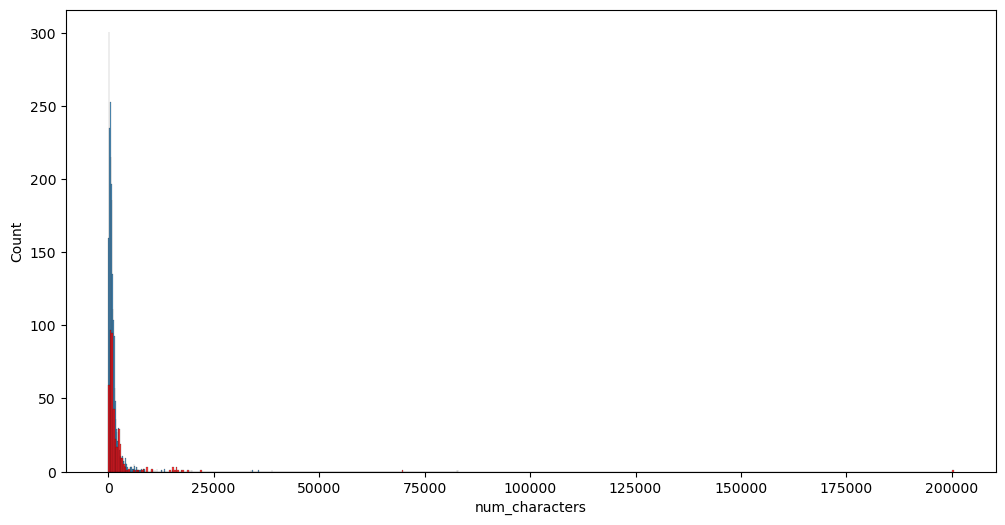

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

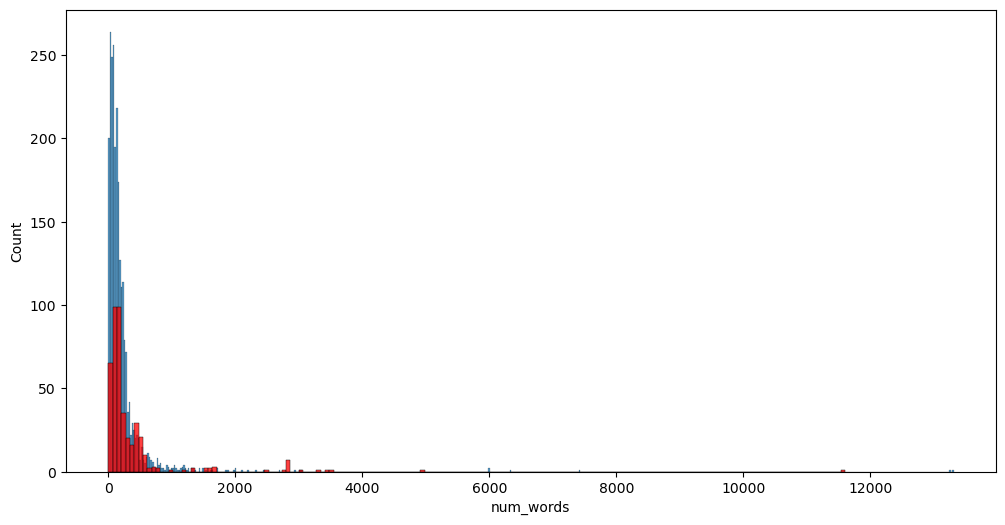

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

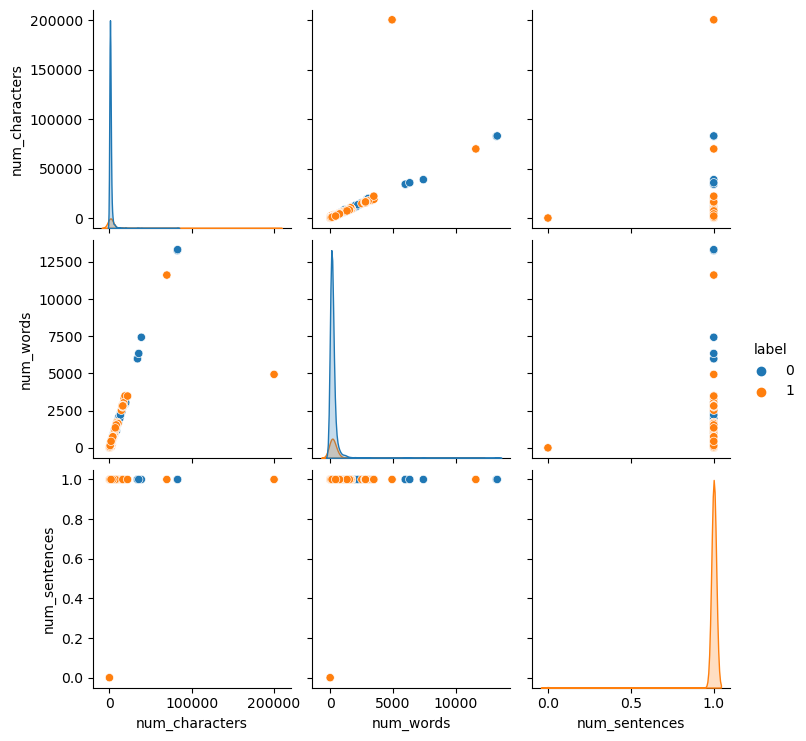

In [46]:
sns.pairplot(df,hue='label')

C:\Users\teams\AppData\Local\Temp\ipykernel_5992\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

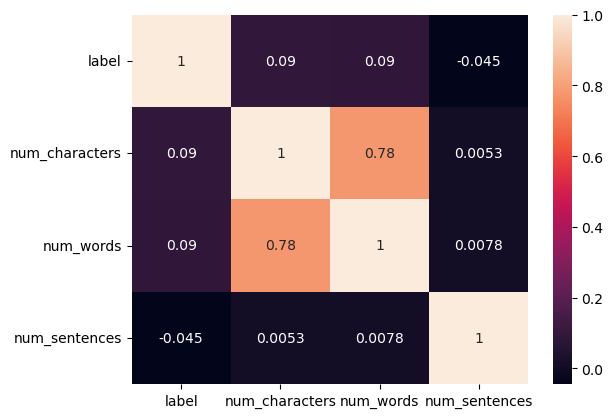

In [47]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [79]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords data
nltk.download('stopwords')

# Get the English stopwords list
stopwords_list = stopwords.words('english')

# Example usage:
text = "This is a sample sentence with some common words."
filtered_words = [word for word in text.split() if word.lower() not in stopwords_list]
print(filtered_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teams\AppData\Roaming\nltk_data...


['sample', 'sentence', 'common', 'words.']


[nltk_data]   Unzipping corpora\stopwords.zip.


In [88]:
def transform_email(email):
    text = text.lower()
    text = nltk.word_tokenize(email)
    
    # Download the stopwords data
    nltk.download('stopwords')
    
    y = []
    for i in email:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in email:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in email:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [90]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

def transform_email(email):
    # Convert the email to lowercase
    text = email.lower()
    
    # Tokenize the email into words
    words = word_tokenize(text)
    
    # Download the stopwords data
    nltk.download('stopwords')
    
    # Remove non-alphanumeric characters
    y = [i for i in words if i.isalnum()]
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    y = [i for i in y if i not in stop_words and i not in string.punctuation]
    
    # Apply stemming
    ps = PorterStemmer()
    y = [ps.stem(i) for i in y]
    
    # Join the words back into a string
    transformed_text = " ".join(y)
    
    return transformed_text


In [91]:
transform_email("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [92]:
df['email'][10]

'hello have you seen and discussed this article and his approach thank you URL hell there are no rules here we re trying to accomplish something thomas alva edison this URL email is sponsored by osdn tired of that same old cell phone get a new here for free URL _______________________________________________ spamassassin devel mailing list spamassassin devel URL URL '

In [93]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [94]:
df['transformed_email'] = df['email'].apply(transform_text)

In [95]:
df.head()

,email,label,num_characters,num_words,num_sentences,transformed_email
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1509,256,1,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,1015,169,1,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,771,144,1,ad cream spaghetti carbonara effect pasta make...


In [96]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [97]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_email'].str.cat(sep=" "))

In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


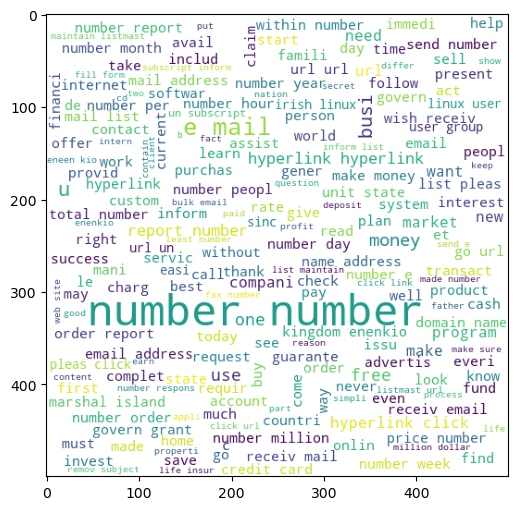

In [99]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [102]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_email'].str.cat(sep=" "))

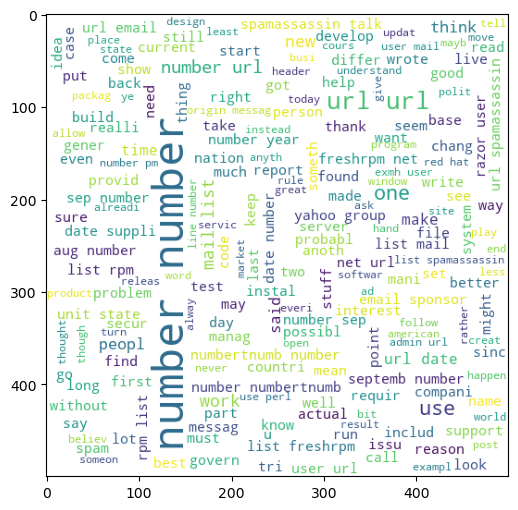

In [103]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [104]:
df.head()

,email,label,num_characters,num_words,num_sentences,transformed_email
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1509,256,1,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,1015,169,1,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,771,144,1,ad cream spaghetti carbonara effect pasta make...


In [105]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_email'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [106]:
len(spam_corpus)

93009

In [107]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

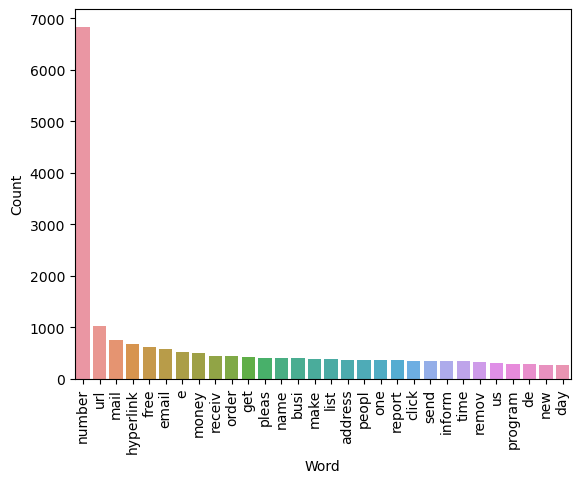

In [108]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spam_corpus = []
for msg in df[df['label'] == 1]['transformed_email'].tolist():
    for word in msg.split():
        spam_corpus.append(word)  # Replace [...] with your actual spam corpus data

# Count the occurrences of each item in the spam_corpus
word_counts = Counter(spam_corpus).most_common(30)

# Convert the word counts to a DataFrame
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Create a bar plot using seaborn
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()


In [111]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_email'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [112]:
len(ham_corpus)

313103

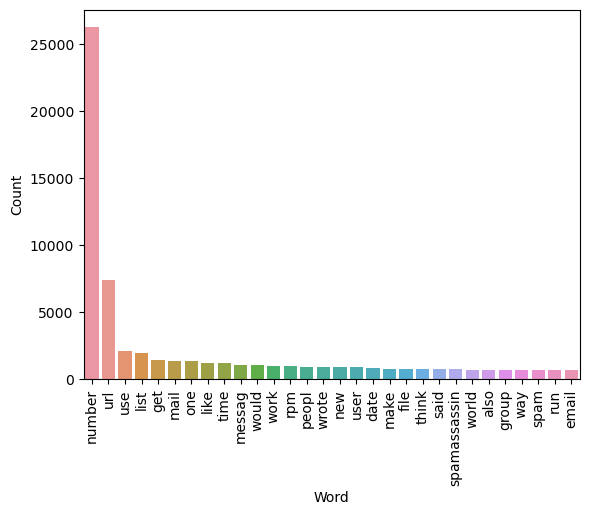

In [115]:
'''from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show() '''

# Count the occurrences of each item in the spam_corpus
word_counts = Counter(ham_corpus).most_common(30)

# Convert the word counts to a DataFrame
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Create a bar plot using seaborn
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [116]:
# Text Vectorization
# using Bag of Words
df.head()

,email,label,num_characters,num_words,num_sentences,transformed_email
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1509,256,1,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,1015,169,1,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,771,144,1,ad cream spaghetti carbonara effect pasta make...


## 4. Model Building

In [117]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [119]:
X = tfidf.fit_transform(df['transformed_email']).toarray()

In [120]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [121]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [122]:
X.shape

(2872, 3000)

In [124]:
y = df['label'].values

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [127]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [128]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [129]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9373913043478261
[[471   6]
 [ 30  68]]
0.918918918918919


In [130]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9669565217391304
[[477   0]
 [ 19  79]]
1.0


In [131]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9391304347826087
[[461  16]
 [ 19  79]]
0.8315789473684211


In [132]:
# tfidf --> MNB

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [134]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [136]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [138]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [139]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9826086956521739, 0.9888888888888889)

In [141]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9826086956521739
Precision -  0.9888888888888889
For  KN
Accuracy -  0.9686956521739131
Precision -  0.9081632653061225
For  NB
Accuracy -  0.9669565217391304
Precision -  1.0
For  DT
Accuracy -  0.9373913043478261
Precision -  0.8875
For  LR
Accuracy -  0.9443478260869566
Precision -  0.9852941176470589
For  RF
Accuracy -  0.9756521739130435
Precision -  0.9883720930232558
For  AdaBoost
Accuracy -  0.9739130434782609
Precision -  0.946236559139785
For  BgC
Accuracy -  0.9634782608695652
Precision -  0.8969072164948454
For  ETC
Accuracy -  0.9686956521739131
Precision -  0.9761904761904762
For  GBDT
Accuracy -  0.9721739130434782
Precision -  0.9880952380952381
For  xgb
Accuracy -  0.9808695652173913
Precision -  1.0


In [142]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [143]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.966957,1.000000
10,xgb,0.980870,1.000000
0,SVC,0.982609,0.988889
5,RF,0.975652,0.988372
9,GBDT,0.972174,0.988095
4,LR,0.944348,0.985294
8,ETC,0.968696,0.976190
6,AdaBoost,0.973913,0.946237
1,KN,0.968696,0.908163
7,BgC,0.963478,0.896907


In [144]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [145]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.966957
1,xgb,Accuracy,0.980870
2,SVC,Accuracy,0.982609
3,RF,Accuracy,0.975652
4,GBDT,Accuracy,0.972174
5,LR,Accuracy,0.944348
6,ETC,Accuracy,0.968696
7,AdaBoost,Accuracy,0.973913
8,KN,Accuracy,0.968696
9,BgC,Accuracy,0.963478


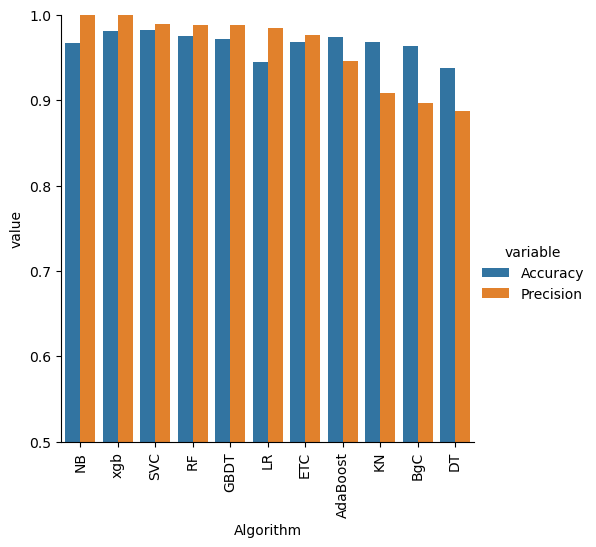

In [146]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [147]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [148]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [149]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [150]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [151]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [152]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [153]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.966957,1.000000,0.966957,1.000000,0.966957,1.000000,0.966957,1.000000
1,xgb,0.980870,1.000000,0.980870,1.000000,0.980870,1.000000,0.980870,1.000000
2,SVC,0.982609,0.988889,0.982609,0.988889,0.982609,0.988889,0.982609,0.988889
3,RF,0.975652,0.988372,0.975652,0.988372,0.975652,0.988372,0.975652,0.988372
4,GBDT,0.972174,0.988095,0.972174,0.988095,0.972174,0.988095,0.972174,0.988095
5,LR,0.944348,0.985294,0.944348,0.985294,0.944348,0.985294,0.944348,0.985294
6,ETC,0.968696,0.976190,0.968696,0.976190,0.968696,0.976190,0.968696,0.976190
7,AdaBoost,0.973913,0.946237,0.973913,0.946237,0.973913,0.946237,0.973913,0.946237
8,KN,0.968696,0.908163,0.968696,0.908163,0.968696,0.908163,0.968696,0.908163
9,BgC,0.963478,0.896907,0.963478,0.896907,0.963478,0.896907,0.963478,0.896907


In [154]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [155]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [156]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [157]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9895652173913043
Precision 1.0


In [158]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [159]:
from sklearn.ensemble import StackingClassifier

In [160]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [161]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9860869565217392
Precision 0.96875
